<a href="https://colab.research.google.com/github/Hassan-zeidan/Statistics-for-Data-Science/blob/main/Week%204/Assignment%203/Hands_On_Application_of_PCA_on_a_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hands-On Application of PCA on a Dataset**

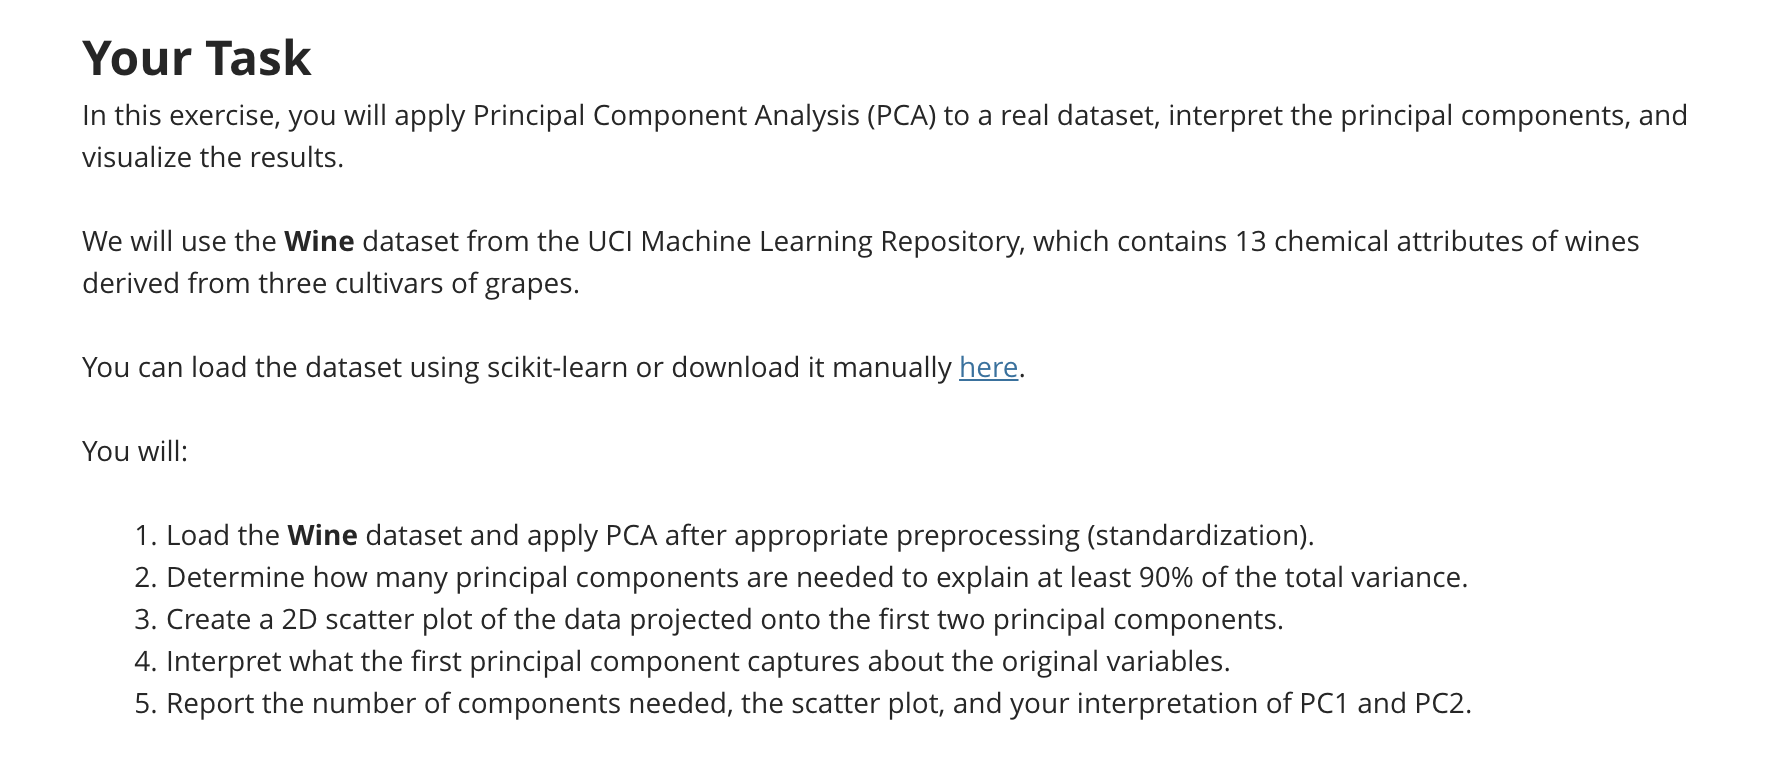

# **step 1**

In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
data = load_wine()
X = data.data      # Features (13 chemical attributes)
y = data.target    # Labels (type of wine)

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **step 2**

In [2]:
from sklearn.decomposition import PCA
import numpy as np

# 1) Fit PCA on standardized data (from Step 1: X_scaled)
pca = PCA()                  # keep all components
pca.fit(X_scaled)

# 2) Cumulative variance and the smallest k reaching 90%
cumvar = np.cumsum(pca.explained_variance_ratio_)
k90 = np.argmax(cumvar >= 0.90) + 1

k90, cumvar[k90-1]

(np.int64(8), np.float64(0.9201754434577263))

In [3]:
pca8 = PCA(n_components=8)
X_pca8 = pca8.fit_transform(X_scaled)   # learn PCs and project to 8D

X_scaled.shape, X_pca8.shape
pca8.explained_variance_ratio_.sum()

np.float64(0.9201754434577263)

# **Step 3**

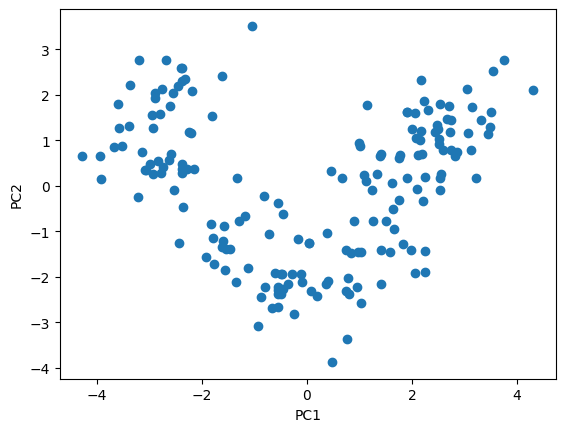

In [4]:
import matplotlib.pyplot as plt

PC1 = X_pca8[:, 0]   # first principal component scores
PC2 = X_pca8[:, 1]   # second principal component scores

plt.scatter(PC1, PC2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# **Step 4**

In [5]:
import numpy as np

feature_names = data.feature_names          # fixed attribute from load_wine()
w1 = pca8.components_[0]                    # PC1 loadings (length 13)

# Top 5 contributors by absolute loading (largest influence)
order = np.argsort(np.abs(w1))[::-1][:5]
for i in order:
    print(f"{feature_names[i]:<25} loading = {w1[i]: .3f}")

flavanoids                loading =  0.423
total_phenols             loading =  0.395
od280/od315_of_diluted_wines loading =  0.376
proanthocyanins           loading =  0.313
nonflavanoid_phenols      loading = -0.299


Interpretation: PC1 mainly captures phenolic/flavonoid richness. Wines with higher PC1 scores have more flavanoids, higher total phenols, higher OD280/OD315, and more proanthocyanins. Lower PC1 scores correspond to wines with relatively higher nonflavanoid phenols. In short, PC1 separates wines along a phenolic-intensity axis.

# **Step 5**

In [7]:
k = pca8.n_components_
cum = pca8.explained_variance_ratio_.sum()
pc1 = pca8.explained_variance_ratio_[0]
pc2 = pca8.explained_variance_ratio_[1]

print(f"k (kept components) = {k}")
print(f"Cumulative explained variance = {cum:.2%}")
print(f"PC1 explains = {pc1:.2%}")
print(f"PC2 explains = {pc2:.2%}")

k (kept components) = 8
Cumulative explained variance = 92.02%
PC1 explains = 36.20%
PC2 explains = 19.21%


In [8]:
import numpy as np

feature_names = data.feature_names  # fixed attribute from load_wine()

for j in [0, 1]:                    # 0=PC1, 1=PC2
    w = pca8.components_[j]         # fixed attribute name; row j = loadings for PC j+1
    top_pos = w.argsort()[-3:][::-1]   # top 3 positive contributors
    top_neg = w.argsort()[:3]          # top 3 negative contributors
    print(f"PC{j+1}: explains {pca8.explained_variance_ratio_[j]:.2%}")
    print("  Top +:", [feature_names[i] for i in top_pos])
    print("  Top -:", [feature_names[i] for i in top_neg])
    print()

PC1: explains 36.20%
  Top +: ['flavanoids', 'total_phenols', 'od280/od315_of_diluted_wines']
  Top -: ['nonflavanoid_phenols', 'malic_acid', 'alcalinity_of_ash']

PC2: explains 19.21%
  Top +: ['color_intensity', 'alcohol', 'proline']
  Top -: ['hue', 'od280/od315_of_diluted_wines', 'alcalinity_of_ash']



PC1 (36.20%) “rich vs lean”
Increases with flavanoids, total phenols, and OD280/OD315. Wines feel richer with more body and structure.
Decreases with nonflavanoid phenols, malic acid, and alkalinity of ash. Wines feel leaner, more tart and mineral.
One line: PC1 separates fuller, phenolic rich wines from lighter, more acidic and mineral wines.

PC2 (19.21%) “strength and color”
Increases with color_intensity, alcohol, and proline. Wines are darker and stronger with a riper feel.
Decreases with hue, OD280/OD315, and alkalinity of ash. Wines are lighter in color and less strong.
One line: PC2 contrasts darker, higher alcohol wines versus lighter colored, lower alcohol wines.